In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
df = pd.read_csv('/content/Thyroid_Diff.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
df['Gender'].replace({'F':0, 'M':1}, inplace=True)
df['Smoking'].replace({'No':0, 'Yes':1}, inplace=True)
df['Hx Smoking'].replace({'No':0, 'Yes':1}, inplace=True)
df['Risk'].replace({'Low':0, 'Intermediate':1, 'High':2}, inplace=True)
df['Recurred'].replace({'No':0, 'Yes':1}, inplace=True)

In [ ]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,0,T1a,N0,M0,I,Indeterminate,0
1,34,0,0,1,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,0,T1a,N0,M0,I,Excellent,0
2,30,0,0,0,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,0,T1a,N0,M0,I,Excellent,0
3,62,0,0,0,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,0,T1a,N0,M0,I,Excellent,0
4,62,0,0,0,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,0,T1a,N0,M0,I,Excellent,0


In [ ]:
df.corrwith(df['Recurred']).abs().sort_values(ascending=False)

<ipython-input-49-50e7abbe41b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Recurred']).abs().sort_values(ascending=False)


Recurred      1.000000
Risk          0.733376
Smoking       0.333243
Gender        0.328189
Age           0.258897
Hx Smoking    0.136073
dtype: float64

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# cat_encoder = OneHotEncoder()

# df_cat_encoded = cat_encoder.fit_transform(df_cat)
# df_cat_encoded.toarray()

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Recurred', axis=1)
y = df['Recurred']

In [ ]:
df_num = X.select_dtypes(include=['int64', 'float64']).columns
df_cat = X.select_dtypes(include=['object']).columns

In [ ]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

In [ ]:
full_pipeline = ColumnTransformer(
    transformers=[
        ('num', num_transformer, df_num),
        ('cat', cat_transformer, df_cat)
])

In [ ]:
X_preprocessed = full_pipeline.fit_transform(X)

# Preparing for ML

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=12)

In [ ]:
#kNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_predict = knn.predict(X_test)

# Model Evaluation

In [ ]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.8055555555555556

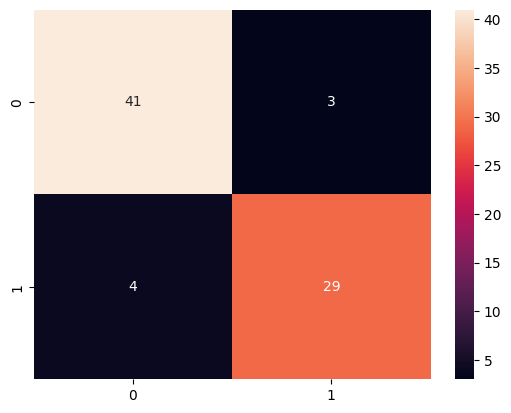

In [ ]:
from sklearn.metrics import confusion_matrix


sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.90625
recall=0.8787878787878788
f1=0.8923076923076922
accuracy=0.9090909090909091
